###  1. Setup

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('../movies.db')

# Read the movies table into a DataFrame
df = pd.read_sql_query('SELECT * FROM movies', conn)

# Close connection
conn.close()

### 2 . Quick Look

In [31]:
print("Data Preview:")
display(df.head())

Data Preview:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,action|adventure|fantasy|sci-fi,...,3054.0,english,usa,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,action|adventure|fantasy,...,1238.0,english,usa,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,action|adventure|thriller,...,994.0,english,uk,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,action|thriller,...,2701.0,english,usa,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,action|adventure|sci-fi,...,738.0,english,usa,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [32]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4894.000000,4923.000000,4935.000000,4917.000000,4928.000000,4.935000e+03,4.935000e+03,4935.000000,4922.000000,4920.000000,4.935000e+03,4935.000000,4925.000000,4935.000000,4628.000000,4935.000000
mean,142.552309,108.167378,687.023708,651.419361,6673.376420,4.084682e+07,8.486459e+04,9847.688146,1.364892,276.552642,3.664620e+07,2002.470517,1676.813807,6.417589,2.129013,7594.607497
std,121.627905,22.541217,2814.410243,1681.394331,15155.538577,6.527049e+07,1.396016e+05,18322.495696,2.013299,380.661993,1.982198e+08,12.474599,4081.226405,1.114600,0.789176,19453.867266
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,53.000000,94.000000,7.000000,133.000000,618.750000,4.822675e+05,8.946000e+03,1427.500000,0.000000,67.000000,3.500080e+06,1999.000000,282.000000,5.800000,1.850000,0.000000
50%,112.000000,104.000000,49.000000,372.000000,995.000000,1.628436e+07,3.498500e+04,3132.000000,1.000000,159.000000,1.600000e+07,2005.000000,599.000000,6.500000,2.350000,166.000000
75%,197.000000,118.000000,195.000000,637.000000,11000.000000,5.244676e+07,9.788800e+04,14026.500000,2.000000,331.000000,4.000000e+07,2011.000000,920.000000,7.200000,2.350000,3000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


### 3. Key Questions 

Top 10 highest-grossing movies

In [33]:
top_grossing = df[['movie_title', 'gross']].sort_values(by='gross', ascending=False).head(10)
display(top_grossing)

,movie_title,gross
0,Avatar,760505847.0
25,Titanic,658672302.0
28,Jurassic World,652177271.0
781,The Avengers,623279547.0
16,The Avengers,623279547.0
65,The Dark Knight,533316061.0
238,Star Wars: Episode I - The Phantom Menace,474544677.0
2963,Star Wars: Episode IV - A New Hope,460935665.0
7,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0


Directors with the most movies

In [34]:
directors_most_movies = df['director_name'].value_counts().head(10)
display(directors_most_movies)

director_name
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Steven Soderbergh    16
Spike Lee            16
Tim Burton           16
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64

Average IMDb score by main genre (splitting genres)

In [35]:
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else 'unknown')
avg_score_by_genre = df.groupby('main_genre')['imdb_score'].mean().sort_values(ascending=False)
display(avg_score_by_genre)

main_genre
film-noir      7.600000
history        7.500000
music          7.200000
documentary    7.175610
biography      7.156972
crime          6.842900
drama          6.743538
western        6.583333
mystery        6.551515
animation      6.540351
adventure      6.516667
fantasy        6.445283
action         6.218783
comedy         6.166949
musical        6.000000
sci-fi         6.000000
romance        5.883333
family         5.709091
horror         5.674459
thriller       5.590909
Name: imdb_score, dtype: float64

### 4. Trends

Movies released per year

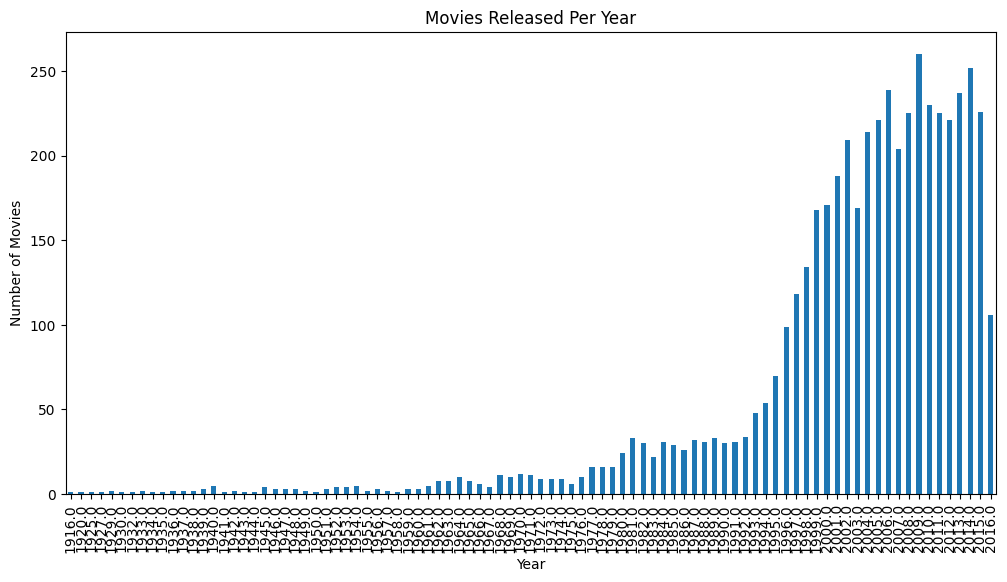

In [36]:
movies_per_year = df['title_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
movies_per_year.plot(kind='bar')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Budget vs Gross scatterplot

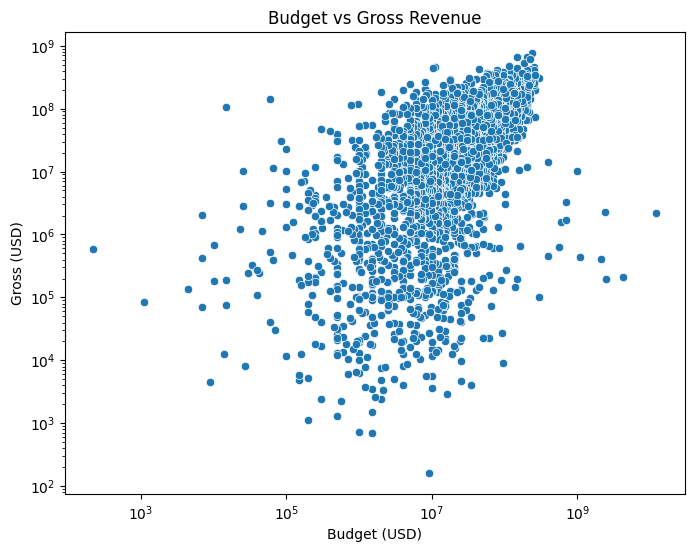

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='budget', y='gross')
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross (USD)')
plt.xscale('log')
plt.yscale('log')
plt.show()

### 5. Correlations

Correlation heatmap

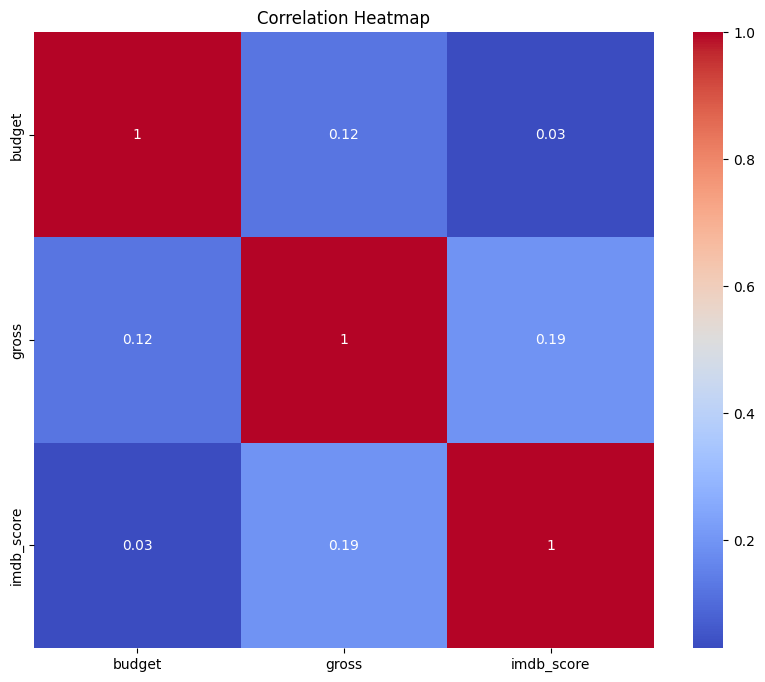

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['budget', 'gross', 'imdb_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()